In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../notes/self-study/dataset/set13_it2_merged.csv',sep=',')

In [ ]:
# 使用rename修改列名，inplace=True直接修改df，不返回新对象。replace是用于替换数据值的方法。
df.rename(columns={'DI': 'ID'}, inplace=True)

df.head(3)

,ID,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,StructuralIntegrity,ExteriorCharm
0,0,147000.0,Meadowlands,brightforge,766.0,9069.0,sqft,6,Common
1,1,98000.0,GnomeBurough,petalbridge,1033.0,4571.0,sqft,5,Common
2,2,325624.0,Meadowlands,silverglen,1662.0,10562.0,sqft,5,Gleaming


In [ ]:
# 检查df中是否有重复行，True表示该行是重复的，False表示不重复。即第一条重复行标记为False，后续相同的行标记为True。duplicates返回一个布尔Series，长度与df行数相同。
duplicates = df.duplicated()
# 计算duplicates中True的数量，也就是重复行的总数。
duplicates.sum()

21

In [ ]:
# 删除df中的重复行，并将结果赋值给df。它会删除所有完全相同的行，保留第一次出现的行。
df = df.drop_duplicates()
# 使用duplicated检查df中是否有重复行，再用df[]筛选df的行，只返回True对应的行。
# 可以想象duplicated是给每行贴个标签（重复=是，非重复=否）。df[...]就像筛选器，只挑出“是”的行。
df[df.duplicated()]

,ID,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,StructuralIntegrity,ExteriorCharm


In [7]:
# 查看数据集里现在有哪些列
print("df columns:", df.columns)

df columns: Index(['ID', 'TradeValue', 'RealmType', 'Enclave', 'LivingQuarters',
       'ParcelSize', 'ParcelSizeUnit', 'StructuralIntegrity', 'ExteriorCharm'],
      dtype='object')


In [8]:
# 定义基础变量
income = 30000 # 年收入3万美元
annual_interest_rate = 0.04 # 年利率4%（0.04）
loan_term_years = 30 # 贷款期限30年
downpayment_percentage = 0.20 # 首付比例20%（0.20）
monthly_income = income / 12 # 月收入 = 30000 / 12 = 2500美元
total_payments = loan_term_years * 12 # 总还款次数 = 30 × 12 = 360个月
monthly_interest_rate = annual_interest_rate / 12 # 月利率 = 0.04 / 12 = 0.003333（约0.3333%）

In [9]:
# 为df添加三列：首付 Downpayment、贷款金额 LoanAmount 和 月供 MonthlyPayment
df['Downpayment'] = df['TradeValue'] * downpayment_percentage
df['LoanAmount'] = df['TradeValue'] - df['Downpayment']
df['MonthlyPayment'] = df['LoanAmount'] * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / \
                             ((1 + monthly_interest_rate) ** total_payments - 1)

In [10]:
# 判断可负担性：添加AffordableDwelling列，标记房子是否在预算内（1=可负担，0=不可负担）。使用astype将布尔值转为整数（1或0）。
df['AffordableDwelling'] = (df['MonthlyPayment'] <= (0.30 * monthly_income)).astype(int)

In [11]:
df.head(3)

,ID,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,StructuralIntegrity,ExteriorCharm,Downpayment,LoanAmount,MonthlyPayment,AffordableDwelling
0,0,147000.0,Meadowlands,brightforge,766.0,9069.0,sqft,6,Common,29400.0,117600.0,561.440387,1
1,1,98000.0,GnomeBurough,petalbridge,1033.0,4571.0,sqft,5,Common,19600.0,78400.0,374.293592,1
2,2,325624.0,Meadowlands,silverglen,1662.0,10562.0,sqft,5,Gleaming,65124.8,260499.2,1243.663025,0


In [ ]:
# 展示df数据集中房屋的可负担性分布（AffordableDwelling列中1和0的数量）。

# 先确认一下1和0各有多少，以免画图时弄错顺序。
# 因为value_counts的结果会按降序排列，大的数字排前面（包括它的索引），而画图时设定x刻度值，使用的索引顺序是[0,1]。
# 如果可负担的量是30，不可负担是10，此时红色条显示的实际上是可负担的数量，而不是不可负担的数量。

# 查看1和0的数量
counts = df['AffordableDwelling'].value_counts()
print(f"不可负担 (0): {counts.get(0, 0)}") # 获取具体值，get(key, default)防止某值不存在（比如全是1时，0的数量返回0）
print(f"可负担 (1): {counts.get(1, 0)}")

不可负担 (0): 673
可负担 (1): 1529


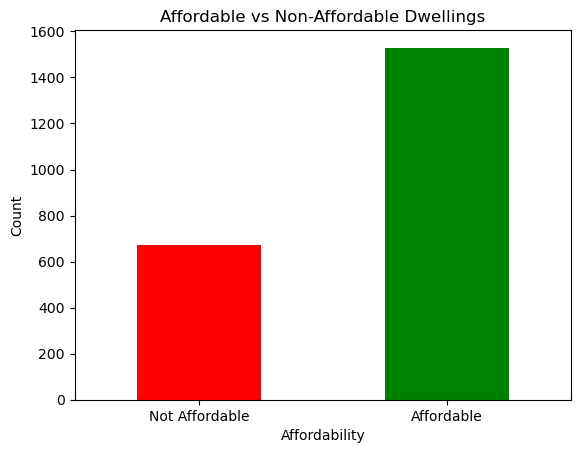

In [ ]:
# 此时可以确定，如果直接使用value_counts的结果画图，颜色和是否能负担的数量是相反的。所以在画图前，需要先将索引顺序调成正常的[0,1]。
ordered_counts = counts.reindex([0, 1], fill_value=0) # fill_value=0：如果新索引[0, 1]中有counts里不存在的索引（比如2），就用0填充。
# 使用正确的顺序，开始画图
ordered_counts.plot(kind='bar', color=['red', 'green'])
plt.xticks(ticks=[0,1], labels=["Not Affordable", "Affordable"], rotation=0) # ticks=[0,1]对应条形的位置（第一个条是0，第二个条是1）
plt.xlabel("Affordability")
plt.ylabel("Count")
plt.title("Affordable vs Non-Affordable Dwellings")
plt.show()

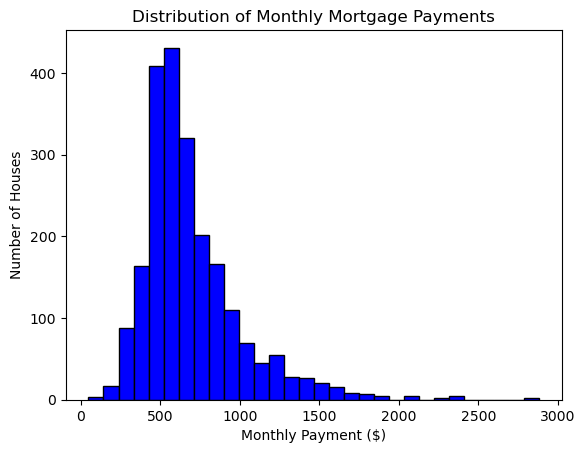

月供最小值: 48.84531370966152
月供最大值: 2883.588384611341


In [15]:
# 展示每栋房子的月供（美元），看看大多数房子的月供是多少
plt.hist(df['MonthlyPayment'], bins=30, color='blue', edgecolor='black')
plt.xlabel("Monthly Payment ($)")
plt.ylabel("Number of Houses")
plt.title("Distribution of Monthly Mortgage Payments")
plt.show()

# 检查范围
print("月供最小值:", df['MonthlyPayment'].min())
print("月供最大值:", df['MonthlyPayment'].max())

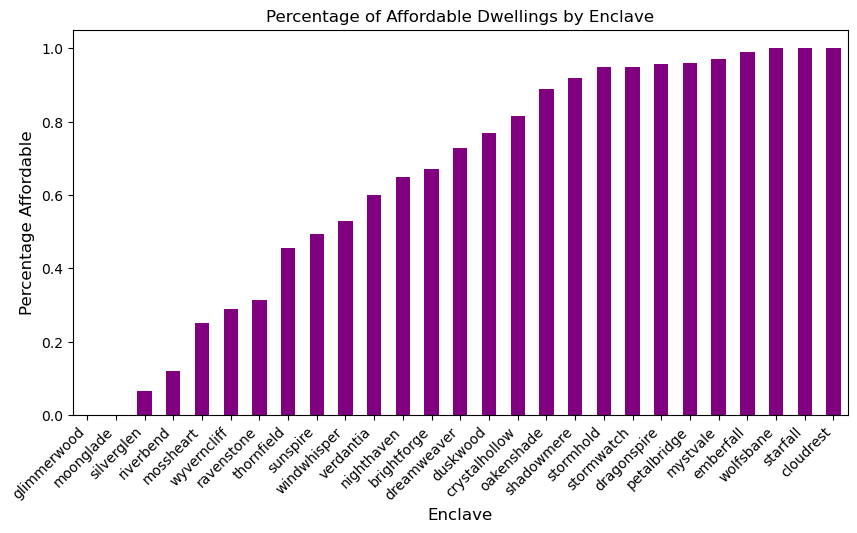

In [ ]:
# 计算df数据集中每个Enclave（小区）的房屋的可负担性比例（AffordableDwelling的平均值），并按比例从小到大排序。

# df_merged.groupby('Enclave'):按Enclave列分组。把df分成多个子集，每个子集对应一个小区（比如brightforge, petalbridge等）
# ['AffordableDwelling']：从每个分组（小区）中提取 AffordableDwelling 这一列，只关注每个小区的可负担性数据（0或1）。比如brightforge: [1, 0, 1, 0]，petalbridge: [1, 1, 1, 0]。
# mean：算出平均值，即可负担房屋的比例，比如brightforge: [1, 0, 1, 0] 平均值 = (1 + 0 + 1 + 0) / 4 = 0.5（50% 可负担）。
# sort_values：让结果按可负担比例升序（从小到大）排列，方便观察哪个小区可负担性最低，哪个最高。
affordable_by_enclave = df.groupby('Enclave')['AffordableDwelling'].mean().sort_values()

plt.figure(figsize=(10,5))
affordable_by_enclave.plot(kind='bar', color='purple')
plt.ylabel("Percentage Affordable", fontsize=12)
plt.xlabel("Enclave", fontsize=12)
plt.xticks(ha='right', rotation=45, fontsize=10)
plt.title("Percentage of Affordable Dwellings by Enclave")
plt.show()

In [ ]:
# 快速掌握这四列的分布和范围，为建模提供直观认识。
# TradeValue 均值18万，范围1万到75万，说明房价差异大。count如果不是2202，说明有缺失值（NaN），需要处理。查看最小值，如果 LoanAmount 或 MonthlyPayment 是负数，可能计算出错。
df[['TradeValue', 'Downpayment', 'LoanAmount', 'MonthlyPayment']].describe()

,TradeValue,Downpayment,LoanAmount,MonthlyPayment
count,2202.000000,2202.000000,2202.000000,2202.000000
mean,181567.430064,36313.486013,145253.944051,693.464546
std,81523.525077,16304.705015,65218.820062,311.364622
min,12789.000000,2557.800000,10231.200000,48.845314
25%,129862.500000,25972.500000,103890.000000,495.986750
50%,160000.000000,32000.000000,128000.000000,611.091578
75%,213000.000000,42600.000000,170400.000000,813.515663
max,755000.000000,151000.000000,604000.000000,2883.588385


接下来，进行机器学习基准模型的构建和评估，目标是预测 AffordableDwelling（是否可负担，0或1）。<br>
包含数据探索、特征选择、数据拆分，最后用最简单的预测方法（众数预测）作为基准。

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# 计算 LivingQuarters（居住面积）按20分位数分组后的可负担比例。看居住面积与可负担性是否相关（面积越大，可能越贵，可负担比例降低）。

# pd.qcut(df['LivingQuarters'], q=20): 把 LivingQuarters 分成20个等频区间（每个区间含约2202/20=110行）。
# .groupby(...)['AffordableDwelling'].mean(): 对每个区间计算 AffordableDwelling 的平均值（即1的占比）。
df.groupby(pd.qcut(df['LivingQuarters'], q=20))['AffordableDwelling'].mean()

# 小于824的几乎100%可负担。大于1408.6的比例低于40%，1498以上更低（<30%）。
# 趋势: 面积越大，可负担率越低。


/var/folders/6m/nmdc67354c9f77107p22bnd00000gn/T/ipykernel_53573/2538413731.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['LivingQuarters'], q=20))['AffordableDwelling'].mean()


LivingQuarters
(255.999, 659.15]    1.000000
(659.15, 710.1]      1.000000
(710.1, 773.3]       1.000000
(773.3, 824.0]       0.991379
(824.0, 866.0]       1.000000
(866.0, 924.6]       1.000000
(924.6, 967.7]       0.909091
(967.7, 1022.4]      0.863636
(1022.4, 1063.45]    0.818182
(1063.45, 1113.0]    0.855856
(1113.0, 1149.0]     0.745455
(1149.0, 1199.0]     0.633929
(1199.0, 1249.65]    0.570093
(1249.65, 1292.0]    0.660870
(1292.0, 1338.0]     0.509259
(1338.0, 1408.6]     0.429907
(1408.6, 1509.0]     0.342342
(1509.0, 1638.7]     0.266055
(1638.7, 1886.95]    0.190909
(1886.95, 4339.0]    0.090090
Name: AffordableDwelling, dtype: float64

In [ ]:
# 计算 ParcelSize（地块大小）按20分位数分组后的可负担比例。地块越大，可负担率下降，但不完全线性。
df.groupby(pd.qcut(df['ParcelSize'], q=20))['AffordableDwelling'].mean()

# 小于6000的普遍高于80%。大于14302.7的比例低于40%，但17139以上略回升。

/var/folders/6m/nmdc67354c9f77107p22bnd00000gn/T/ipykernel_53573/2607158186.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['ParcelSize'], q=20))['AffordableDwelling'].mean()


ParcelSize
(175.58599999999998, 2651.7]    0.954955
(2651.7, 4426.0]                0.758929
(4426.0, 6000.0]                0.874074
(6000.0, 6877.2]                0.879518
(6877.2, 7291.5]                0.918182
(7291.5, 7838.6]                0.818182
(7838.6, 8248.7]                0.763636
(8248.7, 8640.0]                0.840708
(8640.0, 9000.0]                0.730435
(9000.0, 9375.0]                0.707547
(9375.0, 9735.1]                0.811321
(9735.1, 10134.0]               0.702703
(10134.0, 10493.35]             0.642202
(10493.35, 10984.0]             0.663636
(10984.0, 11500.0]              0.513274
(11500.0, 12200.8]              0.588785
(12200.8, 13072.0]              0.468468
(13072.0, 14302.7]              0.385321
(14302.7, 17139.0]              0.400000
(17139.0, 164660.0]             0.468468
Name: AffordableDwelling, dtype: float64

In [ ]:
# 计算每个 StructuralIntegrity（结构完整性）水平的可负担比例。
df.groupby('StructuralIntegrity')['AffordableDwelling'].mean()

# 1-4 高（>85%），5和9较低（56-61%），6-8较高（>80%）。无明显线性关系，5和9是低点。

StructuralIntegrity
1    1.000000
2    0.857143
3    0.945946
4    0.961538
5    0.565495
6    0.881313
7    0.825784
8    0.879630
9    0.617647
Name: AffordableDwelling, dtype: float64

In [ ]:
# 计算每个 ExteriorCharm（外观魅力）类别的可负担比例。
df.groupby('ExteriorCharm')['AffordableDwelling'].mean() # 按 ExteriorCharm（类别变量，如“Common”, “Elegant”）分组。

# Common (91%) 和 Modest (96%) 高。Enchanting (5.7%) 和 Gleaming (36.5%) 低。特定类别（Enchanting, Gleaming）显著不可负担。

ExteriorCharm
Common        0.910437
Enchanting    0.056818
Gleaming      0.364993
Modest        0.961538
Name: AffordableDwelling, dtype: float64

In [24]:
# 建模准备: 明确预测目标，机器学习任务是分类（预测0或1）。为训练和测试集准备目标数据。

# 定义目标变量（target），是 AffordableDwelling 列。
target = df['AffordableDwelling']
# 选择4个特征，组成特征集 features。根据前面分组分析，这4个特征可能与 AffordableDwelling 强相关（比例变化明显）。
features = df[['Enclave', 'LivingQuarters', 'ParcelSize', 'ExteriorCharm']]

# 将数据拆分为训练集和测试集。
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [28]:
# 计算训练集 target_train 的众数（出现最多的值）。[0]: 提取第一个众数值。
most_common_value = target_train.mode()[0]

print(f"目标训练集中出现最多的值是: {most_common_value}")

目标训练集中出现最多的值是: 1


In [29]:
# 创建基准预测。
pred_train = [most_common_value] * len(target_train)
pred_test = [most_common_value] * len(target_test)

In [32]:
# 比较预测值和真实值，计算正确比例。
print('目标训练集的准确率:', accuracy_score(pred_train, target_train))
print('目标测试集的准确率:', accuracy_score(pred_test, target_test))

目标训练集的准确率: 0.7013060760931289
目标测试集的准确率: 0.6666666666666666


接下来，构建一个基于规则的分类模型，用来预测 AffordableDwelling（是否可负担，0或1），并对模型性能进行评估。<br>
它比之前的基准模型（全猜众数）更复杂，利用了之前从数据探索中发现的规律（比如某些 Enclave 或 LivingQuarters 的可负担比例低）。<br>
之后，通过多种指标（准确率、精确率、召回率、特异性）来评估模型效果。

In [33]:
# 定义一个函数，根据每行数据的特征值判断房子是否可负担，返回0（不可负担）或1（可负担）。
# 默认预测为1（可负担，因为数据中1占多数，1529/2202≈69%）。通过4个条件调整预测为0（不可负担）。

def classify_affordability(row):
    prediction = 1  # 默认可负担

    # 条件1：从之前的统计中能看到，Enclave这几个小区的可负担率低于30%
    if row['Enclave'] in ['glimmerwood', 'moonglade', 'silverglen', 'riverbend']:
        prediction = 0

    # 条件2：LivingQuarters > 1509 可负担率低于30%
    if row['LivingQuarters'] > 1509:
        prediction = 0

    # 条件3：ParcelSize > 14302.7 可负担率低于40%
    if row['ParcelSize'] > 14302.7:
        prediction = 0

    # 条件4：ExteriorCharm 是 Enchanting 或 Gleaming 可负担率低于40%
    if row['ExteriorCharm'] in ['Enchanting', 'Gleaming']:
        prediction = 0

    return prediction

In [43]:
# 对训练集和测试集应用 classify_affordability 函数，生成预测。axis=1 表示按行操作。
predictions_train = feature_train.apply(classify_affordability, axis=1)
predictions_test = feature_test.apply(classify_affordability, axis=1)

# 检查前几行的预测
print(predictions_train.head())
# 然后跟真实值比较一下
print(target_train.head())

1982    0
489     0
1201    1
761     1
1698    0
dtype: int64
1982    1
489     0
1201    1
761     1
1698    1
Name: AffordableDwelling, dtype: int64


In [ ]:
# 评估准确性（accuracy）: 整体预测正确率。
# 预测正确的比例 = (正确预测的房子数) / (总房子数)。
# 对比之前的众数基准模型（≈67%），准确性可以看看规则是否更好。
print('目标训练集的准确性：', accuracy_score(predictions_train, target_train))
print('目标测试集的准确性：', accuracy_score(predictions_test, target_test))

# 这个模型有80%的房子预测正确。对比基准模型，之前全猜1是70.13%（训练）和66.67%（测试），提升了约10%，说明规则有效。

目标训练集的准确性： 0.8001135718341851
目标测试集的准确性： 0.800453514739229


In [ ]:
# 评估精确率（precision）：预测1中实际1的比例。
# 预测为1中实际为1的比例 = TP / (TP + FP)。TP：预测1且正确；FP：预测1但实际0。
# 精确率关注预测可负担（1）的可靠性。
print('目标训练集的精确性：', precision_score(predictions_train, target_train))
print('目标测试集的精确性：', precision_score(predictions_test, target_test))

# 这个模型预测为1（可负担）中有74%是真1。在预测可负担时有26%是错的，精确率不算特别高，但有改进空间。

目标训练集的精确性： 0.7392712550607288
目标测试集的精确性： 0.7414965986394558


In [ ]:
# 评估召回率（recall）：实际1中预测1的比例。
# 实际为1中预测为1的比例 = TP / (TP + FN)。FN：实际1但预测0。
# 检查覆盖率，看规则能找回多少真实可负担房子。高召回可能低精确，反之亦然。
print('目标训练集的召回率：', recall_score(predictions_train, target_train))
print('目标测试集的召回率：', recall_score(predictions_test, target_test))

# 这个模型的实际为1中，95-97%被预测为1。漏掉的真1很少，说明对可负担房子的覆盖很好。

目标训练集的召回率： 0.968186638388123
目标测试集的召回率： 0.9478260869565217


In [ ]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
# tp: 实际1预测1（正确可负担）。tn: 实际0预测0（正确不可负担）。
# fp: 实际0预测1（错标可负担）。fn: 实际1预测0（错标不可负担）。
tn, fp, fn, tp = confusion_matrix(target_train, predictions_train).ravel() # .ravel(): 把2x2矩阵展开为一维。

# 计算特异性：实际0中预测0的比例。
# 实际不可负担中预测正确的比例 = TN / (TN + FP)
specificity = tn / (tn + fp)
print(f"特异性: {specificity:.4f}")

# 这个模型的实际为0（不可负担）中，94.3%预测正确。说明对不可负担的房子预测很准。

特异性: 0.9430
